In [1]:
import pandas as pd
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
from uci_dataset import get_HARD

from sklearn.preprocessing import MinMaxScaler

In [47]:
train_dataset_loader, test_dataset_loader, labels_name = get_HARD(l=60)

Data extracted...
Train data shape: (3, 7352, 128)
Train labels shape: (7352,)
Test data shape: (3, 2947, 128)
Test labels shape: (2947,)
(7352, 68, 60)
(2947, 68, 60)


In [11]:
# scaler = MinMaxScaler(feature_range=(-1, 1))
# train_data_all_axes = scaler.fit_transform(train_data_all_axes)
# scaler = MinMaxScaler(feature_range=(-1, 1))
# test_data_all_axes = scaler.fit_transform(test_data_all_axes)

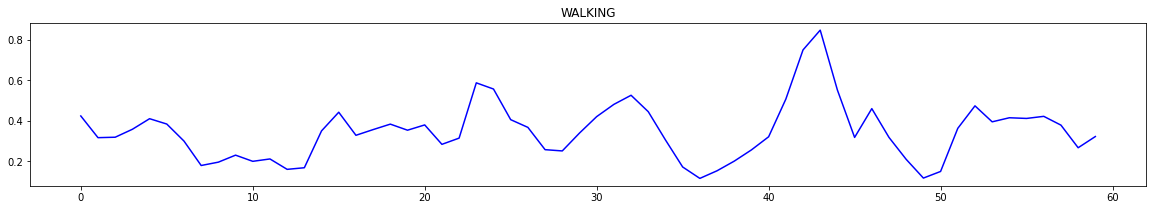

In [48]:
data, target = next(iter(train_loader))
sample = data[0, 0]

plt.figure(figsize=(20, 3))
plt.plot(sample, c='b')
plt.title(labels_name[int(target[0].detach().numpy())])
plt.show()

In [49]:
target

tensor([0, 5, 4, 0, 3, 2, 3, 1])

<hr>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

class fc_model(nn.Module):
    def __init__(self, n_hidden, n_classes):
        super(fc_model, self).__init__()
        self.fc1 = nn.Linear(68*60, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        return F.log_softmax(x, dim=1)

model = fc_model(20000, 6)
model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 100

w_list = []

for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_dataset_loader):
        data, target = Variable(data.cuda()), Variable(target.cuda())
        optimizer.zero_grad()
        prediction = model(data)
        loss = criterion(prediction, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0:
            print('\r[{}]: {}/{}\tLoss: {:.6f}'.format(epoch,
                                                       batch_idx * len(data),
                                                       len(train_dataset_loader.dataset),
                                                       loss.item()), end='')
    
    print()
    w_list.append(model.fc1.weight.data.clone())

        
    correct = 0
    all_samples = 0
    for batch_idx, (data, target) in enumerate(test_dataset_loader):
        data, target = Variable(data.cuda()), Variable(target.cuda())
        prediction = model(data)
        all_samples += 8
        for i in range(target.shape[0]):
            if torch.max(prediction, 1)[1][i] == target[i]:
                correct += 1
    print('{:.6}% test accuracy'.format(correct/all_samples*100))

[0]: 7200/7352	Loss: 1.700854
38.7873% test accuracy
[1]: 7200/7352	Loss: 1.546275
38.7534% test accuracy
[2]: 7200/7352	Loss: 1.561254
43.4621% test accuracy
[3]: 7200/7352	Loss: 1.642773
44.0379% test accuracy
[4]: 7200/7352	Loss: 1.524166
38.2453% test accuracy
[5]: 7200/7352	Loss: 1.306683
44.6138% test accuracy
[6]: 7200/7352	Loss: 2.046430
45.2236% test accuracy
[7]: 7200/7352	Loss: 1.842737
44.9187% test accuracy
[8]: 7200/7352	Loss: 1.162077
45.7995% test accuracy
[9]: 7200/7352	Loss: 1.359687
45.6301% test accuracy
[10]: 7200/7352	Loss: 1.929478
45.4946% test accuracy
[11]: 7200/7352	Loss: 0.979725
45.7995% test accuracy
[12]: 7200/7352	Loss: 1.433145
45.2575% test accuracy
[13]: 7200/7352	Loss: 1.627822
45.7995% test accuracy
[14]: 7200/7352	Loss: 1.701160
45.0542% test accuracy
[15]: 7200/7352	Loss: 1.665030
46.3076% test accuracy
[16]: 7200/7352	Loss: 1.381019
46.1721% test accuracy
[17]: 7200/7352	Loss: 1.492637
46.0366% test accuracy
[18]: 7200/7352	Loss: 1.617169
46.1382

In [64]:
prediction

tensor([[-2.6429, -2.9983, -4.5560, -1.3387, -1.0865, -1.3134],
        [-2.9619, -3.3596, -5.1094, -1.3214, -1.0104, -1.2850],
        [-1.3421, -1.4149, -1.5971, -2.4486, -2.1962, -2.3473]],
       device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [28]:
b, t = next(iter(train_dataset_loader))
b = b.cuda()
with torch.no_grad():
    tmp = model.fc1(b)
    tmp = model.relu(tmp)
    tmp = model.fc2(tmp)
    tmp = model.relu(tmp)
tmp, t 

(tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 33.7543],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 26.1120],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 33.7846],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
        device='cuda:0'),
 tensor([0, 5, 0, 3, 1, 0, 3, 0]))

In [85]:
torch.sum(torch.abs(model.fc1.weight.data - w_list[0]))

tensor(255.8069, device='cuda:0')

In [76]:
correct = 0
all_samples = 0

for batch_idx, (data, target) in enumerate(zip(test_data[0], test_labels)):
    data, target = Variable(torch.from_numpy(data).float()), Variable(torch.LongTensor([target]))
    data = data.view(-1, 128)
    prediction = net(data)
    
    all_samples += 1
    if torch.max(prediction, 1)[1] == target:
        correct += 1

print(correct/all_samples)

0.4574143196470987


In [62]:
torch.max(prediction, 1)[1]

tensor([4])

In [41]:
criterion()

'torch.FloatTensor'